The Alcohol Consumption dataset contains information about the consumption of alcoholic beverages in countries around the world.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = '/content/Alcohol Consumption.csv'
data = pd.read_csv(path)
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [2]:
data.shape

(193, 6)

In [3]:
# Number of samples (rows) and Number of features (columns)

print('Samples:', data.shape[0])
print('Features:', data.shape[1])

Samples: 193
Features: 6


In [4]:
# Is all data complete? What are the column types?

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
# number of null-values

data.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [6]:
# percentage of omissions

np.round(data.isnull().sum() / data.shape[0] * 100, 2) 

country                          0.00
beer_servings                    0.00
spirit_servings                  0.00
wine_servings                    0.00
total_litres_of_pure_alcohol     0.00
continent                       11.92
dtype: float64

The dataset consists of 6 columns and 193 rows. We see that *'continent'* is not completely filled, there are 23 missing values. The rest of the columns do not contain gaps.

In [7]:
data['continent'].unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

In [8]:
data[data.continent.isnull()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [9]:
data[data.continent.isnull()].shape[0] 
# 23 countries do not have a continent

23

Let's name the continents. Trinidad and Tobago - South America.

In [10]:
data.continent[data.country == 'Trinidad & Tobago'] = 'SA'
data[data.continent.isnull()]

<ipython-input-10-bcb1e886c8c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.continent[data.country == 'Trinidad & Tobago'] = 'SA'


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


The rest of the "continentless" countries are in North America.

In [11]:
data.continent[data.continent.isnull()] = 'NA'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


<ipython-input-11-ea91f56e9e5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.continent[data.continent.isnull()] = 'NA'


Thus filled in the gaps in the *continent* column.

* How much beer is drunk in Ukraine?


In [12]:
data.beer_servings[data.country == 'Ukraine']

# data[data.country == 'Ukraine']['beer_servings']         # 2nd way
# data.loc[data['country'] == 'Ukraine', 'beer_servings']  # 3rd way 

180    206
Name: beer_servings, dtype: int64

206 units of beer are drunk in Ukraine.



* Which country drinks the most beer?

In [13]:
data.country[data.beer_servings == data.beer_servings.max()]

# data[data.beer_servings==data.beer_servings.max()].country  # 2nd way

117    Namibia
Name: country, dtype: object

* Top 5 countries by wine consumption.

In [14]:
data.sort_values('wine_servings', ascending=False).head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU
3,Andorra,245,138,312,12.4,EU
166,Switzerland,185,100,280,10.2,EU
48,Denmark,224,81,278,10.4,EU


* Which countries drink wine the least?

In [15]:
data.sort_values('wine_servings').head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
27,Burundi,88,0,0,6.3,AF
116,Myanmar,5,1,0,0.1,AS
107,Mauritania,0,0,0,0.0,AF
106,Marshall Islands,0,0,0,0.0,OC


In [16]:
data.sort_values(['wine_servings', 'total_litres_of_pure_alcohol']).head(13)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
13,Bangladesh,0,0,0,0.0,AS
46,North Korea,0,0,0,0.0,AS
79,Iran,0,0,0,0.0,AS
90,Kuwait,0,0,0,0.0,AS
97,Libya,0,0,0,0.0,AF
103,Maldives,0,0,0,0.0,AS
106,Marshall Islands,0,0,0,0.0,OC
107,Mauritania,0,0,0,0.0,AF
111,Monaco,0,0,0,0.0,EU


* Calculate the average values for all numerical features.

In [17]:
data.mean(axis=0)

<ipython-input-17-02762784858d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean(axis=0)


beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

* Find the average drinking rates (across all columns) for each continent.

In [18]:
data.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,143.090909,166.181818,25.318182,5.977273
OC,89.687500,58.437500,35.625000,3.381250
SA,176.769231,117.923077,58.153846,6.315385


* Which continent drinks the most beer?

In [19]:
data.groupby(by='continent').beer_servings.sum().sort_values(ascending = False).head(1) # или .max() вместо сортировки

continent
EU    8720
Name: beer_servings, dtype: int64

In [20]:
# Create a 'total' column for the total amount of alcohol consumed.

data['total'] = data['beer_servings'] + data['wine_servings'] + data['spirit_servings']  
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


 * How much alcohol is consumed in total on each continent?

In [21]:
data.groupby(by='continent').sum().total.sort_values(ascending=False)

continent
EU    21085
NA     7361
AF     4986
AS     4706
SA     4587
OC     2940
Name: total, dtype: int64

* Sort the table by the *'total_litres_of_pure_alcohol'* column in descending order.

In [22]:
data.sort_values('total_litres_of_pure_alcohol', ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total
15,Belarus,142,373,42,14.4,EU,557
98,Lithuania,343,244,56,12.9,EU,643
3,Andorra,245,138,312,12.4,EU,695
68,Grenada,199,438,28,11.9,NA,665
45,Czech Republic,361,170,134,11.8,EU,665
...,...,...,...,...,...,...,...
79,Iran,0,0,0,0.0,AS,0
90,Kuwait,0,0,0,0.0,AS,0
128,Pakistan,0,0,0,0.0,AS,0
97,Libya,0,0,0,0.0,AF,0


* Build a pivot table on the consumption of beer and wine on different continents.

In [23]:
table = pd.pivot_table(data, 
                       index = 'continent',                       
                       values = ['beer_servings', 'wine_servings'],
                       aggfunc = np.sum)
table.sort_values('beer_servings')

,beer_servings,wine_servings
continent,,
OC,1435,570
AS,1630,399
SA,2298,756
NA,3148,557
AF,3258,862
EU,8720,6400


Text(0.5, 1.0, 'Consumption of beer and wine on different continents')

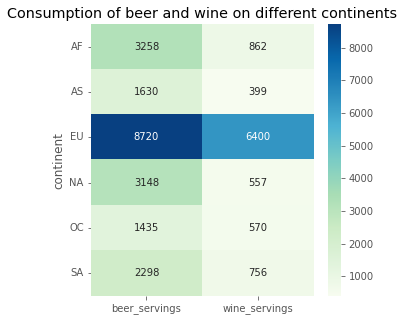

In [24]:
# Visualize the consumption of beer and wine on different continents (1)

plt.style.use('ggplot')
plt.figure(figsize=(5,5))
g = sns.heatmap(table, cmap='GnBu', fmt='d', annot=True)
plt.yticks(rotation=0)
g.set_title('Consumption of beer and wine on different continents')

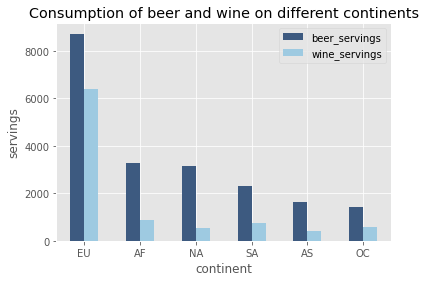

In [25]:
# Visualize the consumption of beer and wine on different continents (2)

plt.style.use('ggplot')
table.sort_values('beer_servings', ascending=False).plot(kind='bar',                                                                                                                  
                                                         color=['#3d5a80', '#9ecae1'],                                                         
                                                         ylabel='servings', 
                                                         title='Consumption of beer and wine on different continents')
plt.xticks(rotation=0)
plt.show()

* Plot the relationship between wine and beer consumption on a graph. Calculate the correlation coefficient.

In [26]:
print('Pearson correlation coefficient:', np.round(data.beer_servings.corr(data.wine_servings), 3))

Pearson correlation coefficient: 0.527


Text(0.5, 1.0, 'Beer and Wine Correlation')

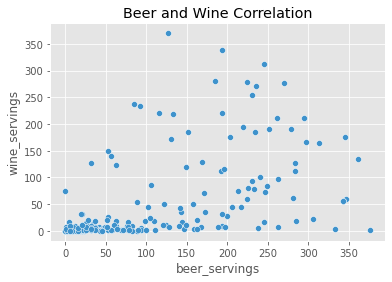

In [27]:
g = sns.scatterplot(data=data,
                    x = 'beer_servings', 
                    y = 'wine_servings',
                    color='#3e92cc')
g.set_title('Beer and Wine Correlation')

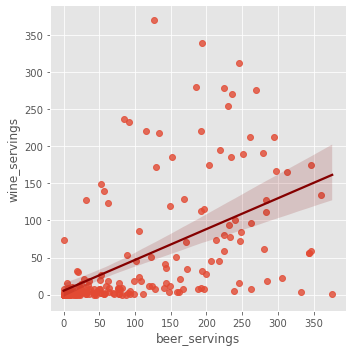

In [29]:
sns.lmplot(data=data, 
           x='beer_servings', 
           y='wine_servings', 
           palette='colorblind', 
           line_kws={'color':'#850000'})

Conclusion: The correlation coefficient is 0.527, which means that the correlation is average.